In [1]:
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus

In [2]:
alice = open('alice_in_wonderland.txt','r').read()

In [3]:
from nltk.tokenize import word_tokenize

In [4]:
# tokenize the text
tokens = word_tokenize(alice)

In [5]:
words = [word for word in tokens if word.isalpha()]

Getting Distinct Frequency

In [6]:
from nltk.probability import FreqDist

In [7]:
fd = FreqDist(words)

In [8]:
fd

FreqDist({'the': 1520, 'and': 774, 'to': 718, 'a': 611, 'it': 513, 'I': 511, 'she': 507, 'of': 496, 'said': 453, 'Alice': 396, ...})

10 Most Common Tokens

In [9]:
fd.most_common(10)

[('the', 1520),
 ('and', 774),
 ('to', 718),
 ('a', 611),
 ('it', 513),
 ('I', 511),
 ('she', 507),
 ('of', 496),
 ('said', 453),
 ('Alice', 396)]

Stemming the tokens

In [10]:
# the porter stemmer
from nltk.stem import PorterStemmer

In [11]:
pst = PorterStemmer()

In [12]:
pst.stem("waiting")

'wait'

In [13]:
stm = ["waited", "waiting", "waits"]
for word in stm :
   print(word+ ":" +pst.stem(word))

waited:wait
waiting:wait
waits:wait


In [14]:
for w in words[:20]:
    print(w+ ":" + pst.stem(w))

CHAPTER:chapter
I:I
Down:down
the:the
Alice:alic
was:wa
beginning:begin
to:to
get:get
very:veri
tired:tire
of:of
sitting:sit
by:by
her:her
sister:sister
on:on
the:the
bank:bank
and:and


the lancaster stemmer is more aggressive than the porter

In [15]:
# 
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
stm = ["giving", "given", "given", "gave"]
for word in stm :
 print(word+ ":" +lst.stem(word))

giving:giv
given:giv
given:giv
gave:gav


In [16]:
for w in words[:20]:
    print(w+ ":" + lst.stem(w))

CHAPTER:chapt
I:i
Down:down
the:the
Alice:al
was:was
beginning:begin
to:to
get:get
very:very
tired:tir
of:of
sitting:sit
by:by
her:her
sister:sist
on:on
the:the
bank:bank
and:and


Lemmatization

In [17]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/person/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus


In [19]:
from nltk.corpus import stopwords
a = set(stopwords.words('english'))


In [20]:
filteredwords = [x for x in words if x not in a]

In [21]:
fdfw = FreqDist(filteredwords)

In [22]:
fdfw20 = [x[0].lower() for x in fdfw.most_common(1000)[230:250]]

In [23]:
for w in fdfw20:
    print(w, lemmatizer.lemmatize(w))

hurry hurry
finished finished
waited waited
minutes minute
game game
hardly hardly
makes make
let let
sea sea
suppose suppose
always always
silence silence
of of
may may
pigeon pigeon
tea tea
sitting sitting
lessons lesson
though though
word word


POS - Parts Of Speech Tagging


In [53]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/person/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [25]:
alice.split('\n')[4:9]

['Alice was beginning to get very tired of sitting by her sister on the',
 'bank, and of having nothing to do: once or twice she had peeped into',
 'the book her sister was reading, but it had no pictures or',
 'conversations in it, “and what is the use of a book,” thought Alice',
 '“without pictures or conversations?”']

In [26]:
for token in words[:20]:
    print(nltk.pos_tag([token]))

[('CHAPTER', 'NN')]
[('I', 'PRP')]
[('Down', 'IN')]
[('the', 'DT')]
[('Alice', 'NN')]
[('was', 'VBD')]
[('beginning', 'VBG')]
[('to', 'TO')]
[('get', 'VB')]
[('very', 'RB')]
[('tired', 'VBN')]
[('of', 'IN')]
[('sitting', 'VBG')]
[('by', 'IN')]
[('her', 'PRP$')]
[('sister', 'NN')]
[('on', 'IN')]
[('the', 'DT')]
[('bank', 'NN')]
[('and', 'CC')]


Named Entity Recognition

More on chunks here:
https://www.programcreek.com/python/example/91258/nltk.ne_chunk

In [58]:
from nltk import ne_chunk

In [28]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/person/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [29]:
nltk.download('words')

[nltk_data] Downloading package words to /Users/person/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [30]:
alice.split('\n')[4:9]

['Alice was beginning to get very tired of sitting by her sister on the',
 'bank, and of having nothing to do: once or twice she had peeped into',
 'the book her sister was reading, but it had no pictures or',
 'conversations in it, “and what is the use of a book,” thought Alice',
 '“without pictures or conversations?”']

In [42]:
[print(x) for x in alice.split('\n')[4:9]]

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or conversations?”


In [46]:
alicetext = "Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, “and what is the use of a book,” thought Alice“without pictures or conversations?”"

In [47]:
token = word_tokenize(alicetext) 
tags = nltk.pos_tag(token)
chunk = ne_chunk(tags)

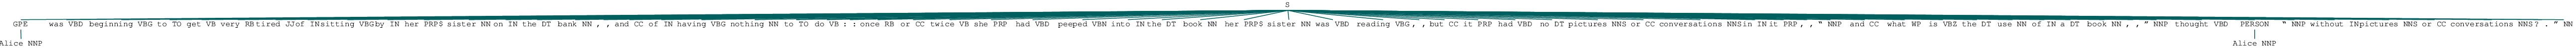

In [48]:
chunk

In [63]:
print(chunk)

(S
  (GPE Alice/NNP)
  was/VBD
  beginning/VBG
  to/TO
  get/VB
  very/RB
  tired/JJ
  of/IN
  sitting/VBG
  by/IN
  her/PRP$
  sister/NN
  on/IN
  the/DT
  bank/NN
  ,/,
  and/CC
  of/IN
  having/VBG
  nothing/NN
  to/TO
  do/VB
  :/:
  once/RB
  or/CC
  twice/VB
  she/PRP
  had/VBD
  peeped/VBN
  into/IN
  the/DT
  book/NN
  her/PRP$
  sister/NN
  was/VBD
  reading/VBG
  ,/,
  but/CC
  it/PRP
  had/VBD
  no/DT
  pictures/NNS
  or/CC
  conversations/NNS
  in/IN
  it/PRP
  ,/,
  “/NNP
  and/CC
  what/WP
  is/VBZ
  the/DT
  use/NN
  of/IN
  a/DT
  book/NN
  ,/,
  ”/NNP
  thought/VBD
  (PERSON Alice/NNP)
  “/NNP
  without/IN
  pictures/NNS
  or/CC
  conversations/NNS
  ?/.
  ”/NN)


In [49]:
from nltk.tree import Tree

In [50]:
def get_continuous_chunks(text):
    chunked = ne_chunk(pos_tag(word_tokenize(text)))
    continuous_chunk = []
    current_chunk = []
    for i in chunked:
            if type(i) == Tree:
                current_chunk.append(" ".join([token for token, pos in i.leaves()]))
                if current_chunk:
                    named_entity = " ".join(current_chunk)
                    if named_entity not in continuous_chunk:
                        continuous_chunk.append(named_entity)
                        current_chunk = []
                else:
                    continue
    return continuous_chunk

In [57]:
get_continuous_chunks(alice)

['Alice',
 'White Rabbit',
 'Rabbit',
 'Rabbit Alice',
 'Alice ORANGE',
 'Which',
 'Alice Latitude',
 'Alice Latitude Longitude',
 'Please',
 'Ma',
 'Australia',
 'Dinah',
 'Dinah Dinah',
 'Dinah Alice',
 'White Rabbit Rabbit',
 'Alice Alice',
 'Alice Alice Alice',
 'Alice Alice EAT',
 'Alice Alice Pool',
 'Tears',
 'Alice English',
 'Right Foot',
 'Hearthrug',
 'Fender',
 'Poor Alice',
 'Alice White Rabbit',
 'Duchess',
 'Duchess Rabbit',
 'Rabbit Alice Ada',
 'Mabel',
 '_I',
 'Multiplication Table',
 'Geography',
 'London',
 'Paris',
 'Paris Rome',
 'Mabel How',
 'How',
 'Mabel Rabbit',
 'How Alice',
 'Alice English Alice',
 'O Mouse',
 'Alice Latin Grammar',
 'Mouse',
 'English',
 'Alice French',
 'William',
 'Alice French Mouse',
 'Mouse Mouse',
 'Mouse _I_',
 'Don',
 'Alice Are',
 'Mouse Alice',
 'Mouse Mouse Mouse',
 'Alice Eaglet',
 'Alice III',
 'Long',
 'Lory',
 'Mouse Mouse Alice',
 'Ahem',
 'Mouse William',
 'Conqueror',
 'English Edwin',
 'Morcar',
 'Mercia',
 'Lory Mouse',

More Chunking


In [60]:
reg = "NP: {<DT>?<JJ>*<NN>}"
a = nltk.RegexpParser(reg)
result = a.parse(tags)

In [62]:
print(result)

(S
  Alice/NNP
  was/VBD
  beginning/VBG
  to/TO
  get/VB
  very/RB
  tired/JJ
  of/IN
  sitting/VBG
  by/IN
  her/PRP$
  (NP sister/NN)
  on/IN
  (NP the/DT bank/NN)
  ,/,
  and/CC
  of/IN
  having/VBG
  (NP nothing/NN)
  to/TO
  do/VB
  :/:
  once/RB
  or/CC
  twice/VB
  she/PRP
  had/VBD
  peeped/VBN
  into/IN
  (NP the/DT book/NN)
  her/PRP$
  (NP sister/NN)
  was/VBD
  reading/VBG
  ,/,
  but/CC
  it/PRP
  had/VBD
  no/DT
  pictures/NNS
  or/CC
  conversations/NNS
  in/IN
  it/PRP
  ,/,
  “/NNP
  and/CC
  what/WP
  is/VBZ
  (NP the/DT use/NN)
  of/IN
  (NP a/DT book/NN)
  ,/,
  ”/NNP
  thought/VBD
  Alice/NNP
  “/NNP
  without/IN
  pictures/NNS
  or/CC
  conversations/NNS
  ?/.
  (NP ”/NN))
